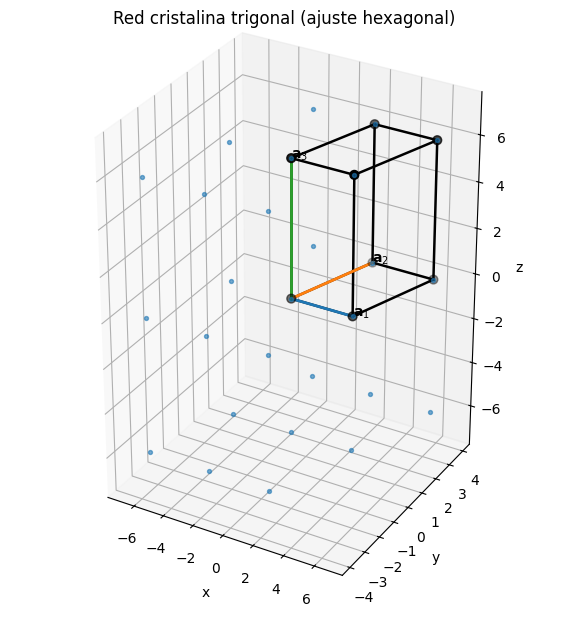

In [5]:
# trigonal_lattice_matplotlib.py
# Diagrama de una red cristalina trigonal (ajuste hexagonal) sin VTK.
# Requisitos: numpy, matplotlib

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 (activa proyección 3D)

# ---------------- Parámetros de celda (ajuste hexagonal) ----------------
# Vectores de la base:
# a1 = (a, 0, 0)
# a2 = (a/2, sqrt(3)*a/2, 0)  -> 120° en el plano
# a3 = (0, 0, c)
a = 4.0   # parámetro basal
c = 6.0   # parámetro vertical

sqrt3 = np.sqrt(3)
a1 = np.array([a, 0.0, 0.0])
a2 = np.array([0.5*a, 0.5*sqrt3*a, 0.0])
a3 = np.array([0.0, 0.0, c])

# --------------- Vértices de la celda unitaria (prisma trigonal) --------
# Combinaciones 0/1 de a1, a2, a3
vertices = []
for i in [0, 1]:
    for j in [0, 1]:
        for k in [0, 1]:
            v = i*a1 + j*a2 + k*a3
            vertices.append(v)
vertices = np.array(vertices)

# Conexiones entre vértices que difieren en un único vector de base
def is_edge(u, v):
    diff = v - u
    # Compara si diff es ±a1, ±a2 o ±a3 (con tolerancia numérica)
    cand = [a1, -a1, a2, -a2, a3, -a3]
    return any(np.allclose(diff, cnd, atol=1e-9) for cnd in cand)

edges = []
for i in range(len(vertices)):
    for j in range(i+1, len(vertices)):
        if is_edge(vertices[i], vertices[j]):
            edges.append((i, j))

# ---------------- Puntos de red (supercelda pequeña para contexto) -------
# Malla 2x2x2 alrededor de la celda para que se aprecie la red
translations = []
for I in range(-1, 2):
    for J in range(-1, 2):
        for K in range(-1, 2):
            translations.append(I*a1 + J*a2 + K*a3)
translations = np.array(translations)

# En red trigonal (Bravais) basta con un único sitio por celda.
basis = np.array([[0.0, 0.0, 0.0]])  # puedes añadir bases adicionales si quieres

lattice_points = []
for t in translations:
    for b in basis:
        lattice_points.append(t + b)
lattice_points = np.array(lattice_points)

# -------------------------- Dibujo ---------------------------------------
fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(111, projection='3d')

# Aristas de la celda
for i, j in edges:
    seg = np.vstack([vertices[i], vertices[j]])
    ax.plot(seg[:, 0], seg[:, 1], seg[:, 2], lw=1.8, color='k')

# Vértices de la celda
ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], s=40, color='k')

# Puntos de red (suaves para no saturar)
ax.scatter(lattice_points[:, 0], lattice_points[:, 1], lattice_points[:, 2],
           s=8, alpha=0.6, depthshade=False)

# Flechas de los vectores de red y etiquetas
def arrow(p0, v, label):
    p1 = p0 + v
    ax.plot([p0[0], p1[0]], [p0[1], p1[1]], [p0[2], p1[2]], lw=2)
    ax.text(p1[0], p1[1], p1[2], label, fontsize=10)

origin = np.zeros(3)
arrow(origin, a1, r"$\mathbf{a}_1$")
arrow(origin, a2, r"$\mathbf{a}_2$")
arrow(origin, a3, r"$\mathbf{a}_3$")

# Aspecto y ejes
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_box_aspect([1, 1, c/a])  # proporción aproximada

# Cuadrícula y límites agradables
all_pts = np.vstack([vertices, lattice_points])
mins = all_pts.min(axis=0)
maxs = all_pts.max(axis=0)
padding = 0.15 * (maxs - mins + 1e-9)
ax.set_xlim(mins[0]-padding[0], maxs[0]+padding[0])
ax.set_ylim(mins[1]-padding[1], maxs[1]+padding[1])
ax.set_zlim(mins[2]-padding[2], maxs[2]+padding[2])

ax.set_title("Red cristalina trigonal (ajuste hexagonal)")
plt.tight_layout()
plt.show()


In [7]:
import numpy as np
from ase import Atoms
import nglview as nv

# Parámetros (a, c) de una celda trigonal en representación hexagonal
a, c = 4.0, 6.0
a1 = np.array([a, 0, 0])
a2 = np.array([0.5*a, np.sqrt(3)*0.5*a, 0])
a3 = np.array([0, 0, c])
cell = [a1, a2, a3]

# Un átomo por celda (red de Bravais)
atoms = Atoms(symbols='X', positions=[[0, 0, 0]], cell=cell, pbc=True)

# Repite para ver la red
atoms = atoms.repeat((3,3,2))

# Visualiza en 3D (interactivo)
nv.show_ase(atoms)


NGLWidget()

In [9]:
from pymatgen.core import Lattice, Structure
from crystal_toolkit.helpers.utils import show_structure

# Trigonal (representación hexagonal)
latt = Lattice.hexagonal(a=4.0, c=6.0)
struct = Structure(latt, ["Si"], [[0, 0, 0]])

app, component = show_structure(struct)  # devuelve una app Dash
# En Jupyter: component
# En script: app.run_server(debug=True)
component  # si estás en Jupyter, renderiza el visor


ModuleNotFoundError: No module named 'crystal_toolkit'